# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error

In [2]:
# Carregando a base features.txt em uma Series
df_features = pd.read_csv('features.txt', delim_whitespace = True, header=None, names = ['ordem', 'colunas'])
series_colunas = df_features['colunas']

In [3]:
# Carregando a base subject_train.txt em uma Series
df_subject_train = pd.read_csv('subject_train.txt', names = ['subject'])
series_subject_train = df_subject_train['subject']

In [4]:
# Carregando a base X_train.txt
X_train = pd.read_csv('X_train.txt', delim_whitespace = True, header=None)
X_train.columns = list(series_colunas)

In [5]:
# Colocando o indicador do indivíduo lido em subject_train.txt como uma variável a mais neste dataframe
X_train['id'] = series_subject_train

In [6]:
# Fazendo com que o dataframe tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
X_train['ordem'] = X_train.index
X_train = X_train.set_index(['ordem','id'])
X_train.head()

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
ordem,id,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [7]:
# Carregando a base subject_test.txt em uma Series
df_subject_test = pd.read_csv('subject_test.txt', names = ['subject'])
series_subject_test = df_subject_test['subject']

In [8]:
# Carregando a base X_test.txt
X_test = pd.read_csv('X_test.txt', delim_whitespace = True, header=None)
X_test.columns = list(series_colunas)

In [9]:
# Colocando o indicador do indivíduo lido em subject_test.txt como uma variável a mais neste dataframe
X_test['id'] = series_subject_test

In [10]:
# Fazendo com que o dataframe tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
X_test['ordem'] = X_test.index
X_test = X_test.set_index(['ordem','id'])
X_test.head()

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
ordem,id,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [11]:
y_train = pd.read_csv('y_train.txt', names = ['atividade_humana'])
y_test = pd.read_csv('y_test.txt', names = ['atividade_humana'])

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Teste. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [12]:
X_train_valid, X_valid, y_train_valid, y_valid = train_test_split(X_train, y_train, test_size=.25, random_state=1729)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [13]:
caminho = DecisionTreeClassifier(random_state=2360873, max_depth=4).fit(X_train_valid, y_train_valid)

In [14]:
# Considerando as 3 variáveis com maior importância para os próximos passos
importances = pd.DataFrame(caminho.feature_importances_, index = X_train_valid.columns)
importances = importances[importances!= 0].sort_values([0], ascending = False)
lista = list(importances[:3].index)
lista

['tGravityAcc-energy()-X', 'fBodyAcc-mean()-X', 'angle(Y,gravityMean)']

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [15]:
%%time
X_train_3 = X_train_valid[lista]
y_train_3 = y_train_valid
caminho = DecisionTreeClassifier(random_state=2360873).cost_complexity_pruning_path(X_train_3, y_train_3)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

CPU times: total: 15.6 ms
Wall time: 27.6 ms


In [16]:
%%time
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train_3, y_train_3)
    clfs.append(clf)

CPU times: total: 5.78 s
Wall time: 6.14 s


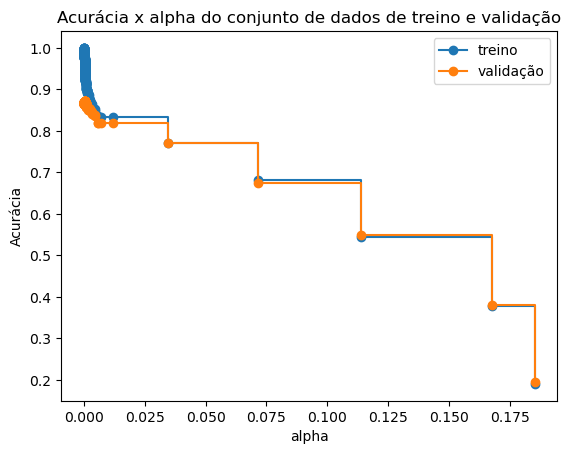

CPU times: total: 2.08 s
Wall time: 2.18 s


In [17]:
%%time
X_valid_3 = X_valid[lista]
y_valid_3 = y_valid
train_scores = [clf.score(X_train_3, y_train_3) for clf in clfs]
valid_scores = [clf.score(X_valid_3, y_valid_3) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [18]:
%%time
# Selecionando a melhor árvore
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]
melhor_arvore

CPU times: total: 0 ns
Wall time: 0 ns


DecisionTreeClassifier(ccp_alpha=0.00040502962156933864, random_state=2360873)

CPU times: total: 31.2 ms
Wall time: 58.6 ms


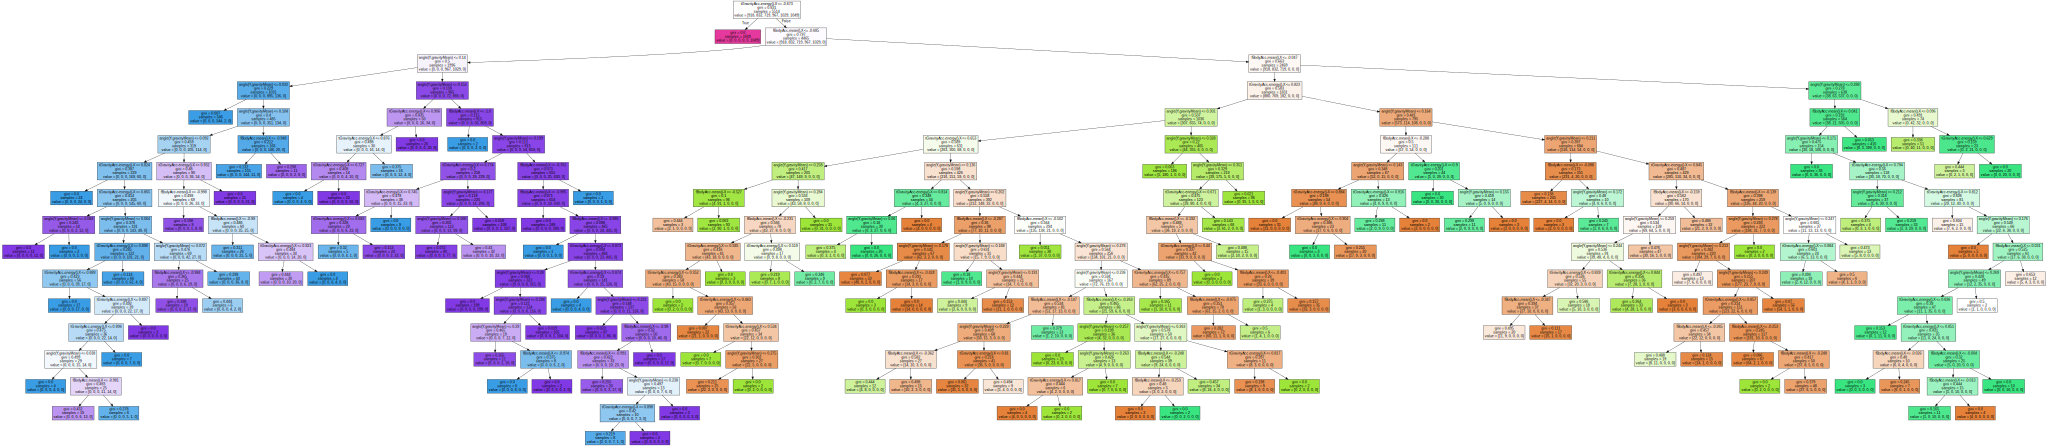

In [19]:
%%time
# DOT data
dot_data = export_graphviz(melhor_arvore, out_file=None, 
                                feature_names=X_valid_3.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [20]:
%%time
# Carregando a base activity_labels.txt em uma Series
df_activity_labels = pd.read_csv('activity_labels.txt', delim_whitespace = True, header=None, names = ['ordem', 'colunas'])
series_activity = df_activity_labels['colunas']

CPU times: total: 15.6 ms
Wall time: 4.02 ms


CPU times: total: 62.5 ms
Wall time: 81 ms


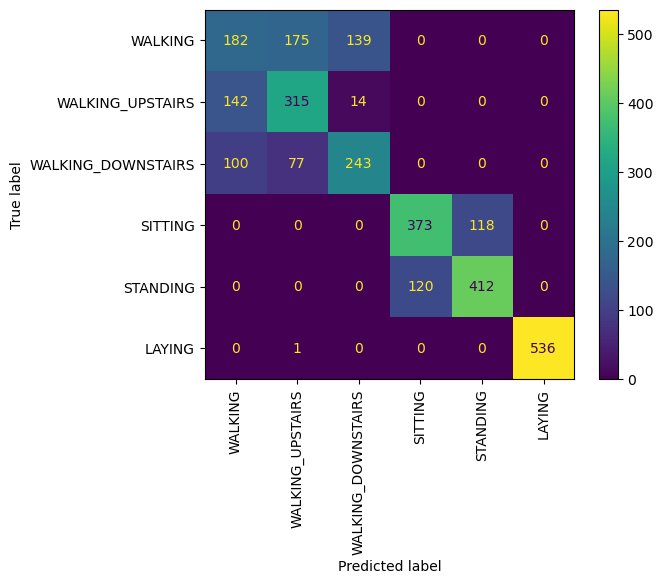

In [21]:
%%time
X_test_3 = X_test[lista]
y_test_3 = y_test
predictions = melhor_arvore.predict(X_test_3)
cm = confusion_matrix(y_test_3, predictions, labels=melhor_arvore.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(series_activity))
disp.plot()
ticks = plt.xticks(rotation = 90)

In [22]:
%%time
# Calculando o R-quadrado da árvore de classificação
print(f"Profundidade: {melhor_arvore.tree_.max_depth}")
print(f"MSE na base de treino: {mean_squared_error(y_train_3, melhor_arvore.predict(X_train_3)):.2f}")
print(f"R_quadrado na base de treino: {melhor_arvore.score(X_train_3, y_train_3):.2f}")
print(f"MSE na base de validação: {mean_squared_error(y_valid_3, melhor_arvore.predict(X_valid_3)):.2f}")
print(f"R_quadrado na base de validação: {melhor_arvore.score(X_valid_3, y_valid_3):.2f}")
print(f"MSE na base de testes: {mean_squared_error(y_test_3, melhor_arvore.predict(X_test_3)):.2f}")
print(f"R_quadrado na base de testes: {melhor_arvore.score(X_test_3, y_test_3):.2f}")

Profundidade: 16
MSE na base de treino: 0.10
R_quadrado na base de treino: 0.94
MSE na base de validação: 0.25
R_quadrado na base de validação: 0.87
MSE na base de testes: 0.55
R_quadrado na base de testes: 0.70
CPU times: total: 0 ns
Wall time: 33.3 ms
